<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/Lasso%2C_Ridge_and_Elastic_Net_Regression_The_Regularization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import IPython

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/bootcamp/multiple_linear_regression/50_Startups.csv")

In [4]:
dataset.head()
dataset.shape

(50, 5)

In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
print('Shape of the input features:', x.shape)
print('Shape of the output features:', y.shape)

Shape of the input features: (50, 4)
Shape of the output features: (50,)


In [7]:
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3] )], remainder='passthrough' )
x =np.array(ct.fit_transform(x))

In [9]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)

[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]


In [14]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
y_pred = regressor.predict(x_test)
MSE_lr = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE_lr)
RMSE_lr = math.sqrt(MSE_lr)
print('Root Mean Squared Error is:', RMSE_lr)
r2_lr = r2_score(y_test, y_pred)
print('R-Squared is:', r2_lr)
adj_lr = 1- (
    (1-r2_lr)*(x_train.shape[0]-1)/
    (x_train.shape[0]-x_train.shape[1]-1)
)
print('Adjusted R-Squared is:', adj_lr)

Mean Squared Error is: 83502864.03256194
Root Mean Squared Error is: 9137.9901527941
R-Squared is: 0.9347068473282546
Adjusted R-Squared is: 0.9228353650243009


In [20]:
# Finding optimal value of alpha

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)
#alphas = np.array([0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.5, 1.0, 3.0, 5.0])
grid1 = GridSearchCV(estimator=lasso, cv=5, scoring='r2', param_grid=dict(alpha=alphas))
grid1.fit(x, y)
print('Best value for alpha is: ', grid1.best_estimator_.alpha)

Best value for alpha is:  0.31622776601683794


In [24]:
lassoReg = Lasso(alpha=0.31)
lassoReg.fit(x_train,y_train)

Lasso(alpha=0.31)

In [25]:
print(lassoReg.coef_)

[ 0.00000000e+00 -9.57952183e+02  6.98411701e+02  7.73474600e-01
  3.28797794e-02  3.66074014e-02]


In [27]:
y_pred = lassoReg.predict(x_test)
MSE_ls = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE_ls)
RMSE_ls = math.sqrt(MSE_ls)
print('Root Mean Squared Error is:', RMSE_ls)
r2_ls = r2_score(y_test, y_pred)
print('R-Squared is:', r2_ls)
adj_ls = 1-(
    (1-r2_ls)*(x_train.shape[0]-1)/
    (x_train.shape[0]-x_train.shape[1]-1)
)
print('Adjusted R-Squared is:', adj_ls)

Mean Squared Error is: 83493480.68354788
Root Mean Squared Error is: 9137.476713160362
R-Squared is: 0.9347141844231776
Adjusted R-Squared is: 0.9228440361364826


In [29]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.02)
ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.02)

In [30]:
print(ridgeReg.coef_)

[ 8.63465505e+01 -8.70958553e+02  7.84612003e+02  7.73476939e-01
  3.28781795e-02  3.66064367e-02]


In [31]:
y_pred = ridgeReg.predict(x_test)
MSE_rd = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE_rd)
RMSE_rd = math.sqrt(MSE_rd)
print('Root Mean Squared Error:', RMSE_rd)
r2_rd = r2_score(y_test, y_pred)
print('R-Squared is:', r2_rd)
adj_rd = 1-(
    (1-r2_rd)*(x_train.shape[0]-1)/
    (x_train.shape[0]-x_train.shape[1]-1)
)
print('Adjusted R-Squared is:', adj_rd)

Mean Squared Error is: 83490143.89467299
Root Mean Squared Error: 9137.294123244199
R-Squared is: 0.9347167935488401
Adjusted R-Squared is: 0.9228471196486292


In [33]:
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha=0.31, l1_ratio=0.5)
ENreg.fit(x_train, y_train)

ElasticNet(alpha=0.31)

In [34]:
print(lassoReg.coef_)

[ 0.00000000e+00 -9.57952183e+02  6.98411701e+02  7.73474600e-01
  3.28797794e-02  3.66074014e-02]


In [35]:
y_pred = ridgeReg.predict(x_test)
MSE_er = mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE_er)
RMSE_er = math.sqrt(MSE_er)
print('Root Mean Squared Error is:', RMSE_er)
r2_er = r2_score(y_test, y_pred)
print('R-Squared is:', r2_er)
adj_er = 1-(
    (1-r2_er)*(x_train.shape[0]-1)/
    (x_train.shape[0]-x_train.shape[1]-1)
)
print('Adjusted R-Squared is:', adj_er)

Mean Squared Error is: 83490143.89467299
Root Mean Squared Error is: 9137.294123244199
R-Squared is: 0.9347167935488401
Adjusted R-Squared is: 0.9228471196486292


In [36]:
pd.DataFrame(data={'Regressor' : ['Linear Regression', 'Lasso Regression','Ridge Regression','EleasticNet Regression'],
                   'MSE':[MSE_lr, MSE_ls, MSE_rd, MSE_er],
                   'RMSE':[RMSE_lr, RMSE_ls, RMSE_rd, RMSE_er],
                   'R2':[r2_lr, r2_ls,r2_rd,r2_er],
                   'Adj R2':[adj_lr, adj_ls, adj_rd, adj_er]
                   })

,Regressor,MSE,RMSE,R2,Adj R2
0,Linear Regression,8.350286e+07,9137.476713,0.934707,0.922835
1,Lasso Regression,8.349348e+07,9137.476713,0.934714,0.922844
2,Ridge Regression,8.349014e+07,9137.294123,0.934717,0.922847
3,EleasticNet Regression,8.349014e+07,9137.294123,0.934717,0.922847


In [37]:
pd.DataFrame(data= {'Regressor':['Linear Regression','Lasso Regression','Ridge Regression','ElasticNet Regression'],
                    'Score': [regressor.score(x_test,y_test),
                              lassoReg.score(x_test,y_test),
                              ridgeReg.score(x_test, y_test),
                              ENreg.score(x_test,y_test)]
                    })

,Regressor,Score
0,Linear Regression,0.934707
1,Lasso Regression,0.934714
2,Ridge Regression,0.934717
3,ElasticNet Regression,0.936575


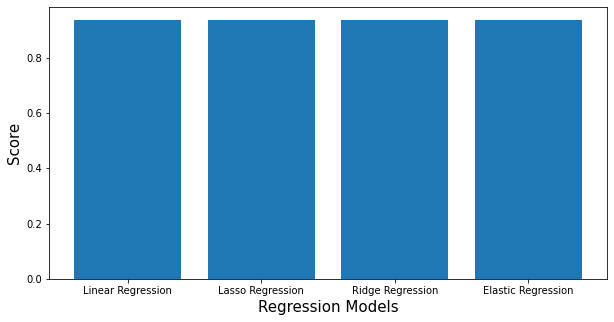

In [39]:
import matplotlib.pyplot as plt
models = ['Linear Regression', 'Lasso Regression','Ridge Regression','Elastic Regression']
scores = [regressor.score(x_test,y_test),
          lassoReg.score(x_test, y_test),
          ridgeReg.score(x_test,y_test),
          ENreg.score(x_test,y_test)]
plt.figure(figsize=(10,5))
plt.bar(models,scores)
plt.xlabel('Regression Models', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.show()